https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature
https://www.seatemperature.org/atlantic-ocean
http://www.nmfs.noaa.gov/pr/species/mammals/dolphins/bottlenose-dolphin.html

In [31]:
%matplotlib inline

from modsim import *

In [49]:
system = System(t0 = 0, 
                t_end = 10,
                dolphin_pop0 = 12532,
                birth_rate = np.random.normal(0.04, 0.02, 11),
                death_rate = np.random.normal(0.0027, 0.13, 11),
                temp_rate = np.random.normal(0.013, 0.008, 11),
                temp0=60)

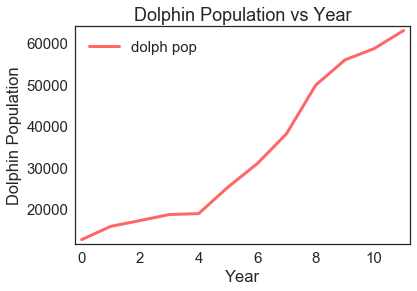

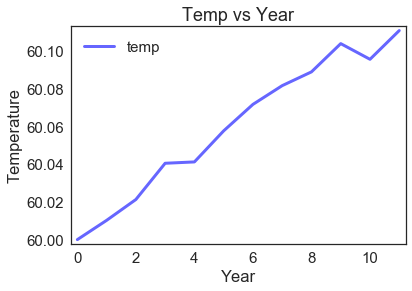

In [50]:
def run_simulation(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `dolphins`.
    
    system: System object with t0, t_end, p0,
            birth_rate, death_rate, temp_rate, and temp0
    """
    dolphins = TimeSeries()
    dolphins[system.t0] = system.dolphin_pop0
    
    temperature=TimeSeries()
    temperature[system.t0] = system.temp0
    
    for t in linrange(system.t0, system.t_end):
        births = system.birth_rate[int(t-system.t0)] * dolphins[t]
        deaths = system.death_rate[int(t-system.t0)] * dolphins[t]
        dolphins[t+1]=dolphins[t]+births-deaths
        temperature[t+1]=system.temp_rate[int(t-system.t0)]+temperature[t]
        
       
            
    system.temperature=temperature            
    system.dolphins = dolphins

run_simulation(system)     

def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.dolphins, 'r', label='dolph pop')
    decorate(xlabel="Year", ylabel="Dolphin Population", title='Dolphin Population vs Year')
    
    newfig()
    plot(system.temperature, 'b-', label='temp')
    decorate(xlabel='Year', 
             ylabel='Temperature',
             title='Temp vs Year')
   
plot_results(system)
    
